In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


#Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")


In [2]:
data = pd.merge(city_data,ride_data, how="outer", on="city")

In [3]:
data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [4]:
urban = data.loc[data["type"]=="Urban"]
urban_city_count = urban.groupby("city")["city"].count()
urban_driver_count = urban.groupby("city")["driver_count"].sum()

In [5]:
suburban = data.loc[data["type"]=="Suburban"]
suburban_city_count = suburban.groupby("city")["city"].count()
suburban_driver_count = suburban.groupby("city")["driver_count"].sum()

In [6]:
rural = data.loc[data["type"]=="Rural"]
rural_city_count = rural.groupby("city")["city"].count()
rural_driver_count = rural.groupby("city")["driver_count"].sum()

In [7]:
averge_urban_fare = urban.groupby("city")["fare"].mean()
averge_suburban_fare = suburban.groupby("city")["fare"].mean()
averge_rural_fare = rural.groupby("city")["fare"].mean()

(17, 45)

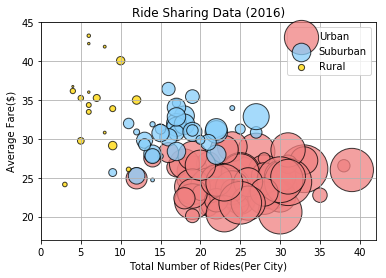

In [18]:
plt.scatter(x=urban_city_count, y=averge_urban_fare, color="#f08080",s=urban_driver_count, alpha=0.75,edgecolor="black", label="Urban")
plt.scatter(x=suburban_city_count, y=averge_suburban_fare, color="#87cefa",s=suburban_driver_count, alpha=0.75,edgecolor="black", label="Suburban")
plt.scatter(x=rural_city_count, y=averge_rural_fare, color="gold",s=rural_driver_count, alpha=0.75,edgecolor="black",label="Rural")
plt.grid()
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.title("Ride Sharing Data (2016)")
plt.legend()
plt.xlim(0,42)
plt.ylim(17,45)

## Total Fares by City Type

In [9]:
total_fare_by_city = data.groupby("type")["fare"].sum()
colors=["gold", "#87cefa","#f08080"]
explode =[0,0,0.10]

Text(0.5,1,'% of Total Fares by City Type')

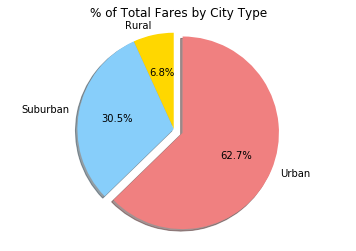

In [19]:
plt.pie(total_fare_by_city, explode=explode, startangle=90, shadow=True, autopct="%1.1f%%", colors=colors, labels=total_fare_by_city.index)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

## Total Rides by City Type

Text(0.5,1,'% of Total Rides by City Type')

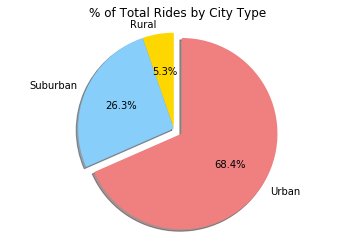

In [20]:
total_ride_by_city = data.groupby("type")["ride_id"].count()
plt.pie(total_ride_by_city, explode=explode, startangle=90, shadow=True, autopct="%1.1f%%", colors=colors, labels=total_ride_by_city.index)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

## Total Drivers by City Type

Text(0.5,1,'% of Total Drivers by City Type')

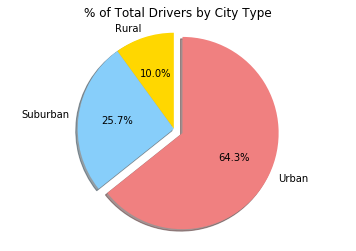

In [21]:
total_driver_by_city = data.groupby("type")["driver_count"].nunique()
plt.pie(total_driver_by_city, explode=explode, startangle=90, shadow=True, autopct="%1.1f%%", colors=colors,labels=total_driver_by_city.index)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

Analysis of Data:
Our urban market yields on average more fares due to the high number of riders in the area.
Our suburban market yields a larger fare amount than our urban market but has fewer drivers and fewer fares compared to our urban market.
Our rural market yields on average a higher fare amount yet has the least amount of drivers and ride opportunities.

Therefore our large volume of revenue is from our urban market. And our rural market drivers can make money due to scarcity of drivers.